In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.shape

(6497, 13)

In [4]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.duplicated().sum()

1168

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(5295, 13)

In [11]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [12]:
df.drop(['type'],axis=1,inplace=True)

In [13]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [14]:
d1=df['quality'].value_counts()
d1

6    2311
5    1745
7     852
4     204
8     148
3      30
9       5
Name: quality, dtype: int64

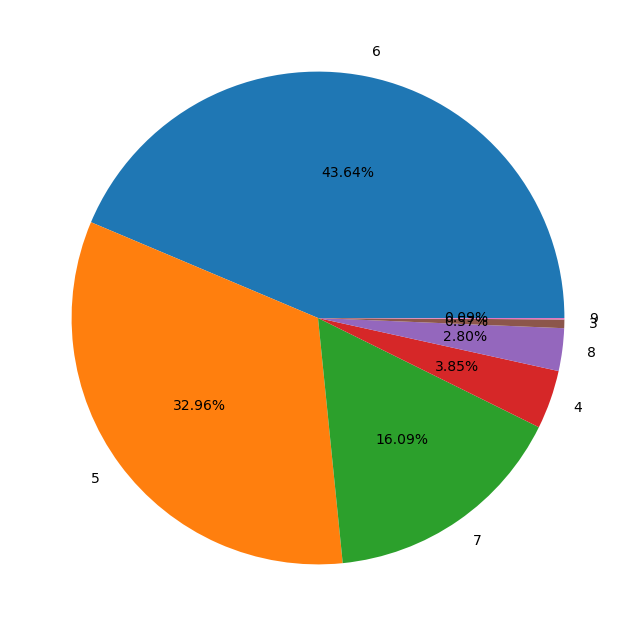

In [15]:
plt.figure(figsize=(10,8))
plt.pie(d1,labels=d1.index,autopct='%.2f%%')
plt.show()

In [16]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [17]:
print(x.shape)
print(y.shape)

(5295, 11)
(5295,)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3971, 11)
(1324, 11)
(3971,)
(1324,)


In [21]:
def gen_cls_metrics(ytest,ypred):
    print('Accuracy Score',accuracy_score(ytest,ypred))
    cm=confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred,zero_division=0))

def train_test_score(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

#### SVM

In [ ]:
m1=SVC(kernel='linear',C=1)
m1.fit(x_train,y_train)

In [ ]:
train_test_score(m1)

In [ ]:
ypred_m1=m1.predict(x_test)
print(ypred_m1)

In [ ]:
print('Metrics for SVM Classifier')
gen_cls_metrics(y_test,ypred_m1)

#### Decision Tree

In [ ]:
m2=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=12)
m2.fit(x_train,y_train)

In [ ]:
train_test_score(m2)

In [ ]:
ypred_m2=m2.predict(x_test)
print(ypred_m2)

In [ ]:
print('Metrics for Decision Tree Classifier')
gen_cls_metrics(y_test,ypred_m2)

#### Random Forest Classifier

In [ ]:
m3=RandomForestClassifier(n_estimators=70,criterion='gini',max_depth=5)
m3.fit(x_train,y_train)

In [ ]:
train_test_score(m3)

In [ ]:
ypred_m3=m3.predict(x_test)
print(ypred_m3)

In [ ]:
print('Metrics for Random Forest Classifier')
gen_cls_metrics(y_test,ypred_m3)

#### Log Regression

In [ ]:
m4=LogisticRegression(max_iter= 10000)
m4.fit(x_train,y_train)

In [ ]:
train_test_score(m4)

In [ ]:
ypred_m4=m4.predict(x_test)
print(ypred_m4)

In [ ]:
print('Logistic Regression')
gen_cls_metrics(y_test,ypred_m4)

#### KNN

In [ ]:
m5=KNeighborsClassifier(n_neighbors=49)
m5.fit(x_train,y_train)

In [ ]:
train_test_score(m5)

In [ ]:
ypred_m5=m5.predict(x_test)
print(ypred_m5)

In [ ]:
print('KNN')
gen_cls_metrics(y_test,ypred_m5)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
m6=GaussianNB()
m6.fit(x_train,y_train)

In [ ]:
train_test_score(m6)

In [ ]:
ypred_m6=m6.predict(x_test)
print(ypred_m6)

In [ ]:
print('Naive Bayes')
gen_cls_metrics(y_test,ypred_m6)